# 음악 취향 분석 프로젝트
## 문제 정의
* 음악 청취 습관 또는 취향에 변화가 있었을지 파악하고자 한다.
### 구체적인 문제 정의
* 음악을 청취하는 시간대, 청취 시간에 변화가 있을 것이다.
* 특별히 많이 듣는 음악 또는 아티스트에 변화가 있었을 것이다.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [2]:
# 스트리밍 내역
history_1= pd.read_json('./account/StreamingHistory0.json')
history_2= pd.read_json('./account/StreamingHistory1.json')

print(history_1.shape, history_2.shape)

(10000, 4) (7589, 4)


In [3]:
history_1.head()

,endTime,artistName,trackName,msPlayed
0,2022-11-08 13:26,Disciple,"Dear X, You Don't Own Me",121303
1,2022-11-08 14:16,Hollywood Undead,Day Of The Dead,99912
2,2022-11-09 01:47,Slipknot,Duality,252613
3,2022-11-09 01:51,All Good Things,For the Glory,279308
4,2022-11-09 01:55,Solence,Animal in Me,5665


In [4]:
history_2.tail()

,endTime,artistName,trackName,msPlayed
7584,2023-11-08 01:39,Fox Stevenson,Go Like,464
7585,2023-11-08 01:39,Amaranthe,Drop Dead Cynical,0
7586,2023-11-08 01:39,Virtual Riot,Energy Drink,281240
7587,2023-11-08 01:43,Dynazty,Heartless Madness,239866
7588,2023-11-08 01:47,Fox Stevenson,Go Like,233946


In [5]:
# 스트리밍 내역 테이블 결합
history= pd.concat([history_1, history_2]).reset_index(drop= True)
history

,endTime,artistName,trackName,msPlayed
0,2022-11-08 13:26,Disciple,"Dear X, You Don't Own Me",121303
1,2022-11-08 14:16,Hollywood Undead,Day Of The Dead,99912
2,2022-11-09 01:47,Slipknot,Duality,252613
3,2022-11-09 01:51,All Good Things,For the Glory,279308
4,2022-11-09 01:55,Solence,Animal in Me,5665
...,...,...,...,...
17584,2023-11-08 01:39,Fox Stevenson,Go Like,464
17585,2023-11-08 01:39,Amaranthe,Drop Dead Cynical,0
17586,2023-11-08 01:39,Virtual Riot,Energy Drink,281240
17587,2023-11-08 01:43,Dynazty,Heartless Madness,239866


### 음악을 청취하는 시간대, 청취 시간에 변화가 있었을 것이다.

In [6]:
# 스트리밍 시간대-> timestamp로 변경
history['endTime']= pd.to_datetime(history['endTime'])
# 스트리밍 시간대를 연, 월, 연월, 일, 시간으로 분리
history['streamingDate']= history['endTime'].dt.strftime('%Y-%m-%d')
history['streamingYear']= history['endTime'].dt.year
history['streamingMonth']= history['endTime'].dt.month
history['streamingYearMonth']= history['endTime'].dt.strftime('%Y-%m')
history['streamingDay']= history['endTime'].dt.day
history['streamingHour']= history['endTime'].dt.hour
# 스트리밍 시간-> ms to minute-> msPlayed/ 60000
history['minPlayed']= history['msPlayed']/ 60000

history.head()

,endTime,artistName,trackName,msPlayed,streamingDate,streamingYear,streamingMonth,streamingYearMonth,streamingDay,streamingHour,minPlayed
0,2022-11-08 13:26:00,Disciple,"Dear X, You Don't Own Me",121303,2022-11-08,2022,11,2022-11,8,13,2.021717
1,2022-11-08 14:16:00,Hollywood Undead,Day Of The Dead,99912,2022-11-08,2022,11,2022-11,8,14,1.665200
2,2022-11-09 01:47:00,Slipknot,Duality,252613,2022-11-09,2022,11,2022-11,9,1,4.210217
3,2022-11-09 01:51:00,All Good Things,For the Glory,279308,2022-11-09,2022,11,2022-11,9,1,4.655133
4,2022-11-09 01:55:00,Solence,Animal in Me,5665,2022-11-09,2022,11,2022-11,9,1,0.094417


In [7]:
# 1. 음악 청취 시간대
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

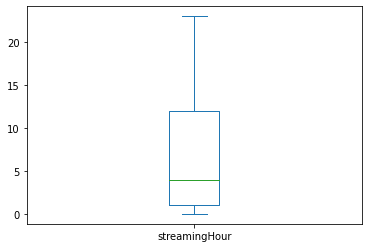

In [8]:
history['streamingHour'].plot.box()

* 주로 새벽과 오전에 많이 청취함
* 취침 전(0~2시)에 듣는 경향도 있음

<AxesSubplot:>

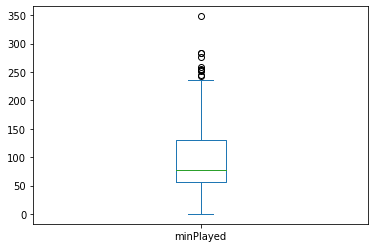

In [9]:
# 2. 플레이타임
# 하루에 얼마나 듣는지?
# 일별 playtime 합산
# 합산된 시간의 분포 확인
daily_playtime= history['minPlayed'].groupby(history['streamingDate']).sum().reset_index()
daily_playtime['minPlayed'].plot.box()

* 주로 하루 50분에서 2시간 가량 청취함
* 하루 1시간에서 2시간 청취하는 경우가 가장 많음

In [10]:
# 3. 일별 청취 시간대의 변화 확인
# 일별 청취 시간대를 월별로 집계
hour_count= history.groupby(['streamingDate', 'streamingHour'])['endTime'].count().reset_index().rename(columns= {'endTime' : 'count'})
# 연월 컬럼 추가
hour_count['streamingDate']= pd.to_datetime(hour_count['streamingDate'])
hour_count['streamingYearMonth']= hour_count['streamingDate'].dt.strftime('%Y-%m')
hour_count

,streamingDate,streamingHour,count,streamingYearMonth
0,2022-11-08,13,1,2022-11
1,2022-11-08,14,1,2022-11
2,2022-11-09,1,6,2022-11
3,2022-11-09,2,23,2022-11
4,2022-11-09,16,12,2022-11
...,...,...,...,...
1291,2023-11-07,0,12,2023-11
1292,2023-11-07,1,15,2023-11
1293,2023-11-07,3,1,2023-11
1294,2023-11-08,0,9,2023-11


<AxesSubplot:xlabel='streamingYearMonth', ylabel='streamingHour'>

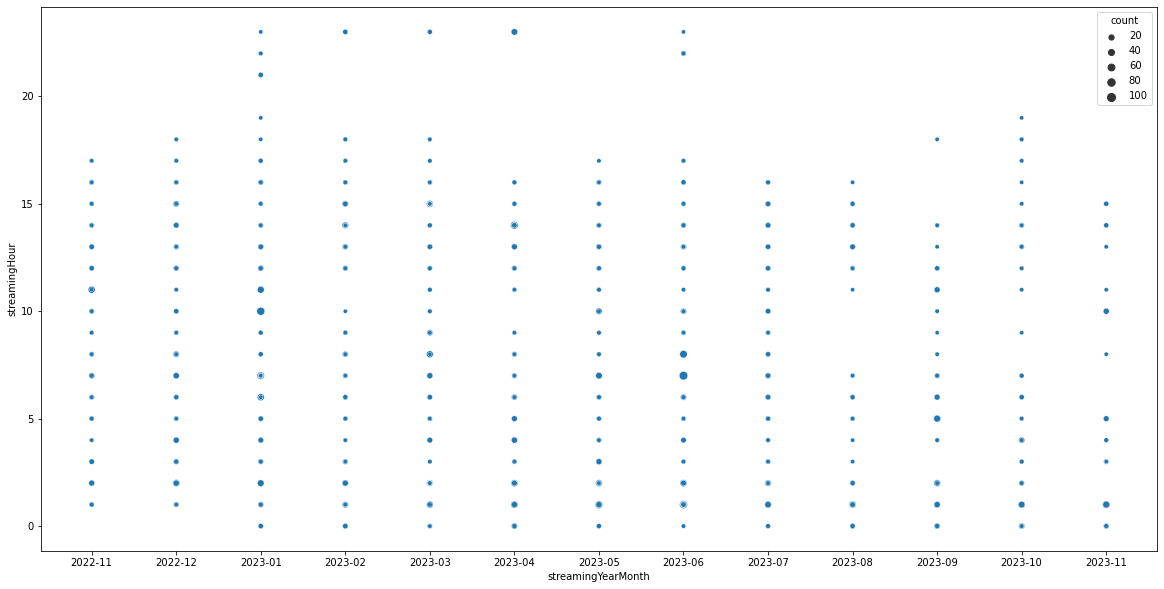

In [11]:
plt.figure(figsize= (20, 10))
sns.scatterplot(data= hour_count, x= 'streamingYearMonth', y= 'streamingHour',
                size= 'count')

* 음악 청취가 전반적으로 뜸해짐
* 주 청취 시간대가 앞당겨짐

In [12]:
# 청취 시간의 변화
# 월별로 집계해서 시각화
daily_playtime['streamingMonth']= pd.to_datetime(daily_playtime['streamingDate']).dt.strftime('%Y-%m')
daily_playtime

,streamingDate,minPlayed,streamingMonth
0,2022-11-08,3.686917,2022-11
1,2022-11-09,100.397383,2022-11
2,2022-11-10,182.638800,2022-11
3,2022-11-11,74.475050,2022-11
4,2022-11-12,103.263700,2022-11
...,...,...,...
319,2023-11-03,187.737467,2023-11
320,2023-11-04,57.053100,2023-11
321,2023-11-05,2.502333,2023-11
322,2023-11-07,68.960200,2023-11


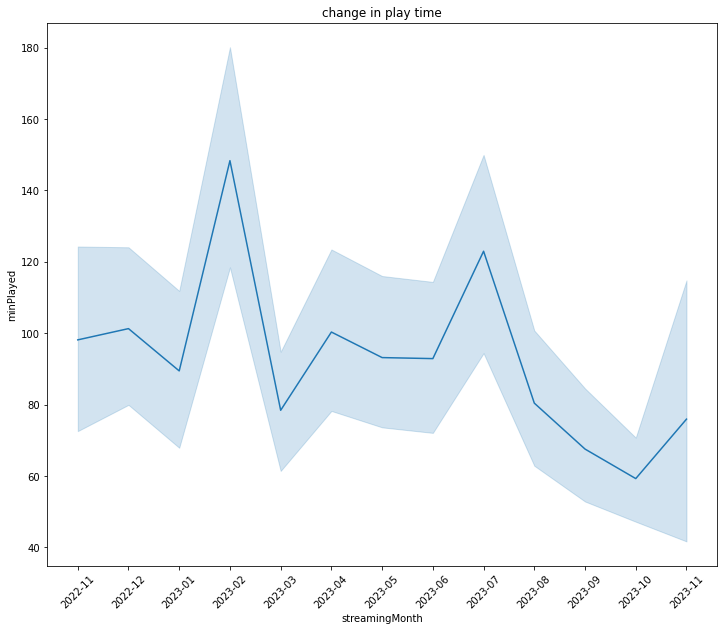

In [13]:
plt.figure(figsize= (12, 10))
a= sns.lineplot(data= daily_playtime, x= 'streamingMonth', y= 'minPlayed')
a.set_title('change in play time')
plt.xticks(rotation= 45)
plt.show()

* 23년 1월에 피크를 찍고 지속적으로 감소함
* 23년도 11월에는 약간의 상승세를 보임

### 특별히 많이 듣는 음악 또는 아티스트에 변화가 있었을 것이다.

In [14]:
# api를 통해 곡들의 러닝 타임 정보를 수집해야됨
# 러닝타임과 기록별 재생시간의 차이-> 각 재생에 재생 타입 부여
# ['lapsed', 'leanback', 'light', 'moderate', 'super'] (marquee 데이터의 이벤트 타입 컬럼 참고)
history

,endTime,artistName,trackName,msPlayed,streamingDate,streamingYear,streamingMonth,streamingYearMonth,streamingDay,streamingHour,minPlayed
0,2022-11-08 13:26:00,Disciple,"Dear X, You Don't Own Me",121303,2022-11-08,2022,11,2022-11,8,13,2.021717
1,2022-11-08 14:16:00,Hollywood Undead,Day Of The Dead,99912,2022-11-08,2022,11,2022-11,8,14,1.665200
2,2022-11-09 01:47:00,Slipknot,Duality,252613,2022-11-09,2022,11,2022-11,9,1,4.210217
3,2022-11-09 01:51:00,All Good Things,For the Glory,279308,2022-11-09,2022,11,2022-11,9,1,4.655133
4,2022-11-09 01:55:00,Solence,Animal in Me,5665,2022-11-09,2022,11,2022-11,9,1,0.094417
...,...,...,...,...,...,...,...,...,...,...,...
17584,2023-11-08 01:39:00,Fox Stevenson,Go Like,464,2023-11-08,2023,11,2023-11,8,1,0.007733
17585,2023-11-08 01:39:00,Amaranthe,Drop Dead Cynical,0,2023-11-08,2023,11,2023-11,8,1,0.000000
17586,2023-11-08 01:39:00,Virtual Riot,Energy Drink,281240,2023-11-08,2023,11,2023-11,8,1,4.687333
17587,2023-11-08 01:43:00,Dynazty,Heartless Madness,239866,2023-11-08,2023,11,2023-11,8,1,3.997767


In [15]:
# api
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager= SpotifyClientCredentials(client_id= '5e31691277084c049eb5fdee39722645',
                                                     client_secret= '32e599441b624e8197b0380595cbb0bb')

sp= spotipy.Spotify(client_credentials_manager= client_credentials_manager)

In [16]:
# 트랙별 id 추출
artist_name= []
track_name= []
track_id= []
# 해당 기간에 재생한 음악들
track_history= history[['artistName', 'trackName']].drop_duplicates()

for index in track_history.index :
    # 트랙별 아티스트명, 음악명 일치하는 결과 상위 1개씩만 검색
    result= sp.search(q= [f"artist : {track_history['artistName'][index]}",
                          f"track : {track_history['trackName'][index]}"],
                        type= 'track', limit= 1)

    for i, t in enumerate(result['tracks']['items']) :
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])

df_tracks= pd.DataFrame({'artistName' : artist_name,
                         'trackName' : track_name,
                         'trackId' : track_id})

df_tracks

,artistName,trackName,trackId
0,Disciple,Invisible,63LW4zVVWtrM5cVrJVREM5
1,Hollywood Undead,Undead,5wBLDkxVvclanSitx5jq8e
2,Slipknot,Custer,3GiJq4AQK7324mfIQbpiTf
3,All Good Things,For the Glory,030D3duTUTfJORIycOhZNr
4,Solence,Blackout,4qn2rc3Y91HUSCzC61z6qa
...,...,...,...
2735,Vicetone,Animal,6IE6DtVDkPotP6rApA7a10
2736,Ludwig van Beethoven,"Piano Sonata No. 25 in G Major, Op. 79: Piano ...",2lmoB2oA2ODySWOOIxuADl
2737,dirtybirdie,for you,7EUp5t0R3xhWNRaOiIleFV
2738,Aad Aalberts,Focus,7r9M2GybYSWqLaFI3TjS5i


In [17]:
# 혹시 모를 중복값 제거
df_tracks= df_tracks.drop_duplicates()
df_tracks.shape

(1071, 3)

In [19]:
runtime= []
for track_id in df_tracks.trackId :
    # duration= sp.audio_features(track_id)[0]['duration_ms']
    runtime.append(sp.audio_features(track_id)[0]['duration_ms'])

    

print(len(runtime))

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=63LW4zVVWtrM5cVrJVREM5:
 Max Retries, reason: too many 429 error responses